In [ ]:
import sys
sys.path.append("/home/twhit/smcdet")

from smcdet.images import M71ImageModel

import torch

import matplotlib.pyplot as plt

import numpy as np

import pickle

from einops import rearrange

We load in the M71 tiles and catalogs:

In [2]:
m71_tiles = torch.load("../../m71/manyimages/data/tiles.pt")
m71_counts = torch.load("../../m71/manyimages/data/unpruned_counts_magcut.pt")
m71_locs = torch.load("../../m71/manyimages/data/unpruned_locs_magcut.pt")
m71_fluxes = torch.load("../../m71/manyimages/data/unpruned_fluxes_magcut.pt")

In `generate_images.py`, we generated semi-synthetic images by passing the M71 catalogs (with one pixel of latent padding around each 8x8 image) into our image model. We load in these semi-synthetic images:

In [3]:
images = torch.load("data/images.pt")

We compare the semi-synthetic images to the real M71 tiles:

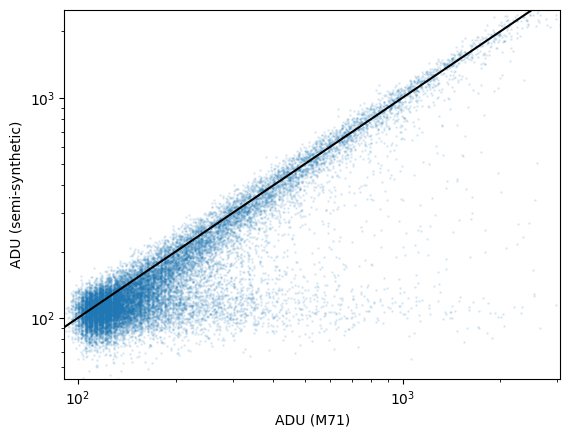

In [4]:
_ = plt.scatter(m71_tiles.flatten(),
                images.flatten(), alpha = 0.1, s = 1)
_ = plt.xlim(m71_tiles.quantile(0), m71_tiles.quantile(0.99))
_ = plt.ylim(images.quantile(0), images.quantile(0.99))
_ = plt.axline((m71_tiles.min(), m71_tiles.min()), slope = 1, color = 'black')
_ = plt.xscale('log')
_ = plt.yscale('log')
_ = plt.xlabel('ADU (M71)')
_ = plt.ylabel('ADU (semi-synthetic)')

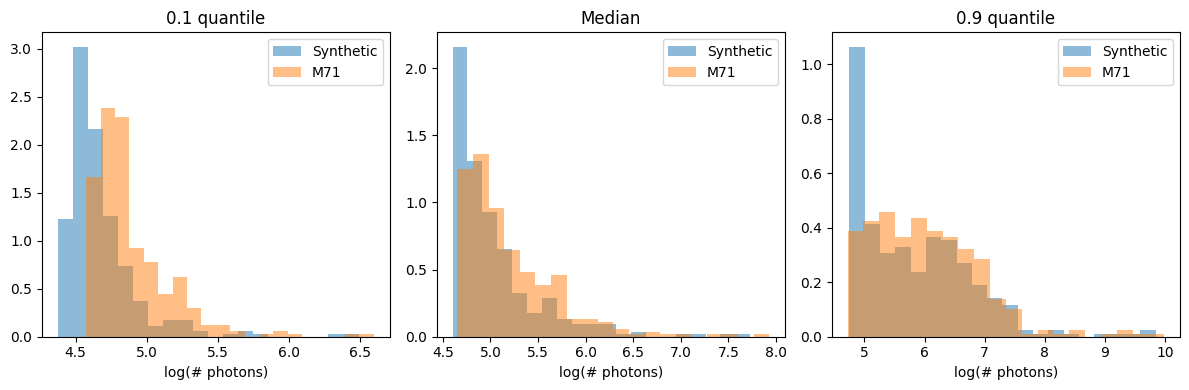

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))

_ = ax[0].hist(images.flatten(-2,-1).log().quantile(0.1, dim=-1), label = 'Synthetic',
               density = True, bins = 20, alpha = 0.5)
_ = ax[0].hist(m71_tiles.flatten(-2,-1).log().quantile(0.1, dim=-1), label = "M71",
               density = True, bins = 20, alpha = 0.5)
_ = ax[0].set_title('0.1 quantile')
_ = ax[0].set_xlabel('log(# photons)')
_ = ax[0].legend()

_ = ax[1].hist(images.flatten(-2,-1).log().median(-1).values, label = 'Synthetic',
               density = True, bins = 20, alpha = 0.5)
_ = ax[1].hist(m71_tiles.flatten(-2,-1).log().median(-1).values, label = "M71",
               density = True, bins = 20, alpha = 0.5)
_ = ax[1].set_title('Median')
_ = ax[1].set_xlabel('log(# photons)')
_ = ax[1].legend()

_ = ax[2].hist(images.flatten(-2,-1).log().quantile(0.9, dim=-1), label = 'Synthetic',
               density = True, bins = 20, alpha = 0.5)
_ = ax[2].hist(m71_tiles.flatten(-2,-1).log().quantile(0.9, dim=-1), label = "M71",
               density = True, bins = 20, alpha = 0.5)
_ = ax[2].set_title('0.9 quantile')
_ = ax[2].set_xlabel('log(# photons)')
_ = ax[2].legend()

fig.tight_layout()